# Climate Tipping Point Predictor: Predicting Climate Thresholds Where CO₂ Emissions Trigger Accelerated Sea Level Rise Using Temporal Causal Modeling

Problem Statement:
    
Despite growing awareness of climate change, the nonlinear relationship between CO₂ emissions and sea level rise remains poorly understood. 
This project aims to develop a temporal machine learning model that identifies critical thresholds of CO₂ emissions beyond which sea level 
rise accelerates disproportionately. By integrating time-series data on temperature, precipitation, humidity, and wind speed, the model will 
uncover hidden causal patterns and predict when and where climate tipping points may occur.


In [30]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/KIIT0001/OneDrive/Desktop/MAHASWETA/EduNet/climate_change_data.csv")
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


Data Preprocessing

In [3]:
df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [5]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [6]:
# Checking for null values
df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Droping duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
# Encoding categorical columns 
df['location'] = df['location'].astype('category')
df['country'] = df['country'].astype('category')

In [11]:
# Extract date features 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [12]:
df.head()

,date,location,country,temperature,co2_emissions,sea_level_rise,precipitation,humidity,wind_speed,year,month,day
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4


Exploratory Data Analysys (EDA)

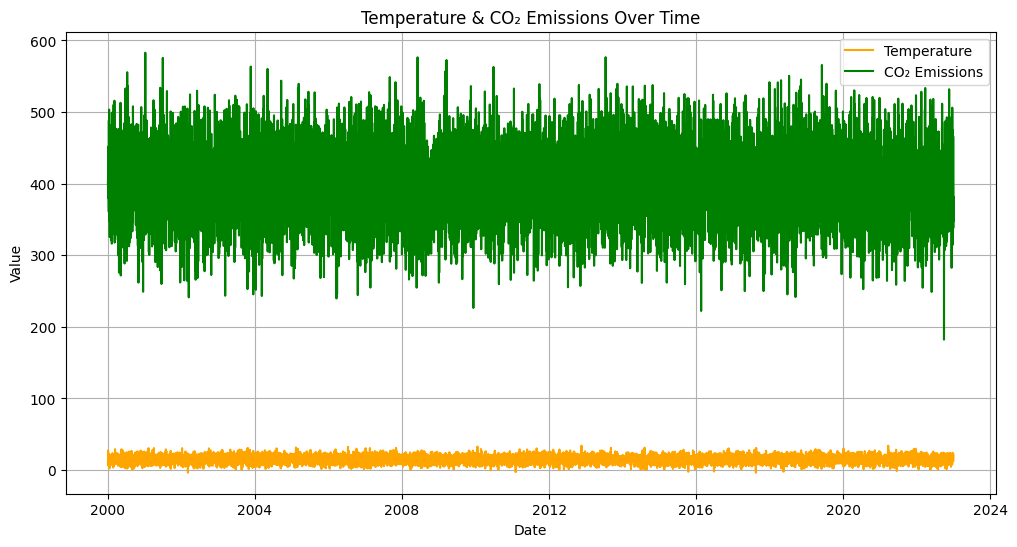

In [13]:
# Time series trend analysis for increase of CO2 as per temperature

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature'], label='Temperature', color='orange')
plt.plot(df.index, df['co2_emissions'], label='CO₂ Emissions', color='green')
plt.title("Temperature & CO₂ Emissions Over Time")
plt.xlabel("Date")
plt.ylabel("Value")

plt.legend()
plt.grid(True)
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_2980\2262151603.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_stats = df.groupby('country')[['temperature', 'co2_emissions', 'humidity']].mean().sort_values(by='temperature', ascending=False)


                          temperature  co2_emissions   humidity
country                                                        
United States of America    17.280005     387.682379  41.478402
Saint Martin                16.989042     402.170667  51.002131
Niger                       16.963188     394.446739  51.471236
Turks and Caicos Islands    16.924763     398.618043  50.290812
Switzerland                 16.519842     389.343317  50.445856
...                               ...            ...        ...
Serbia                      13.409504     390.453804  56.092981
Poland                      13.087618     387.563328  44.049276
Sweden                      12.865208     399.853492  50.298725
Solomon Islands             12.837809     392.747059  53.145751
Kazakhstan                  12.554785     388.675285  48.910696

[243 rows x 3 columns]


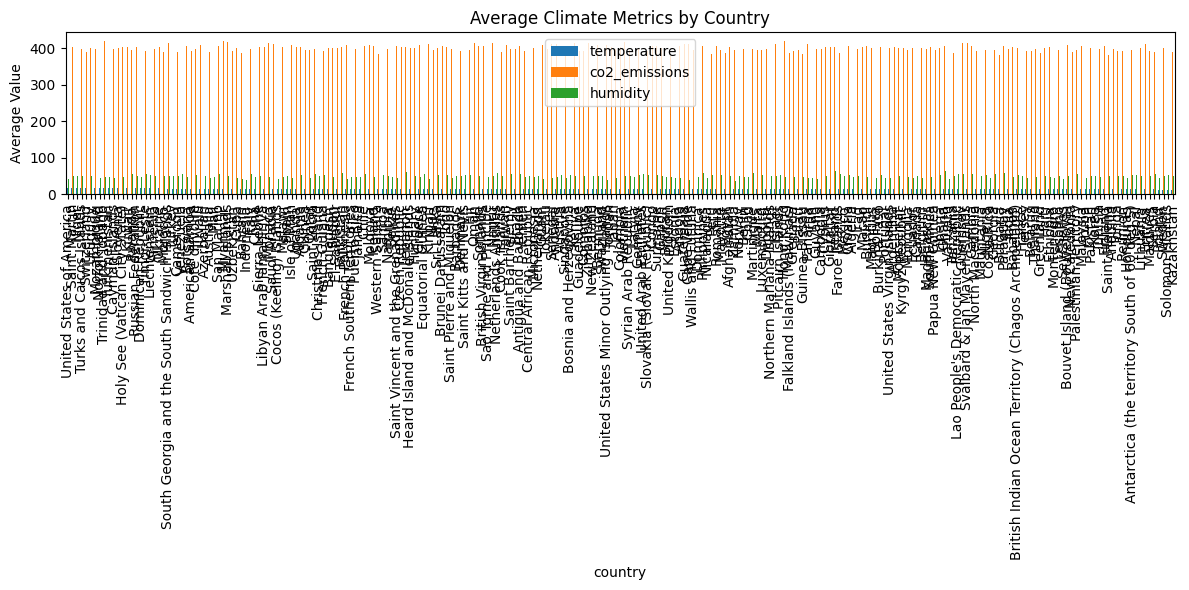

In [14]:
# Average metrics per country

country_stats = df.groupby('country')[['temperature', 'co2_emissions', 'humidity']].mean().sort_values(by='temperature', ascending=False)
print(country_stats)

# Optional: Bar plot
country_stats.plot(kind='bar', figsize=(12, 6))
plt.title("Average Climate Metrics by Country")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

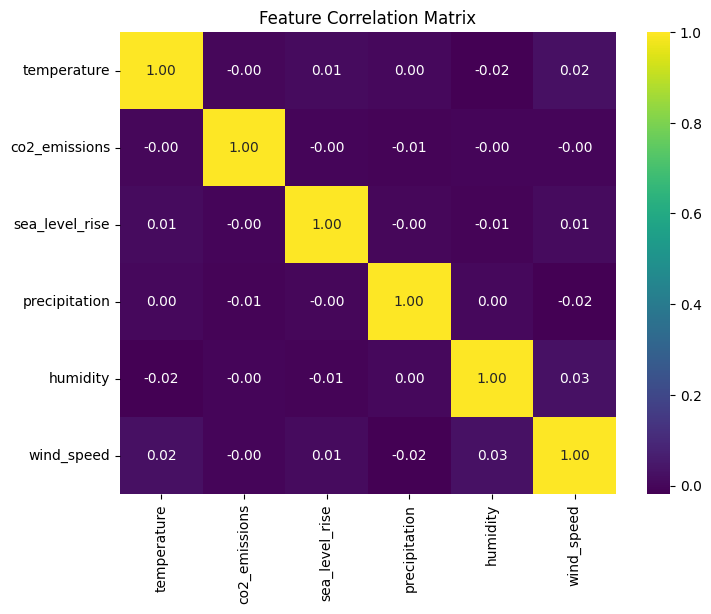

In [15]:
# Select numeric features

numeric_cols = ['temperature', 'co2_emissions', 'sea_level_rise', 'precipitation', 'humidity', 'wind_speed']
corr_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

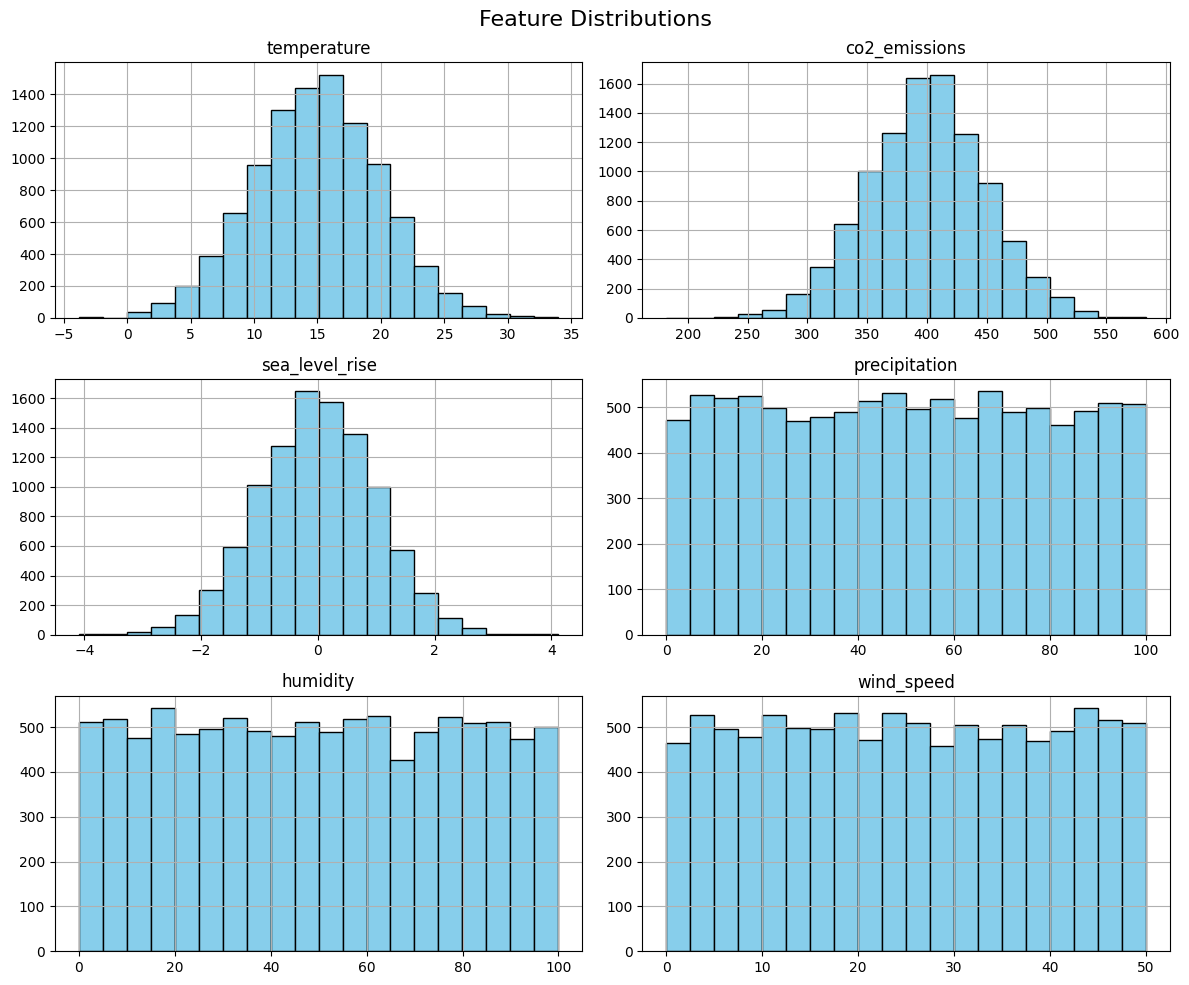

In [16]:
# Histogram for each feature

df[numeric_cols].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

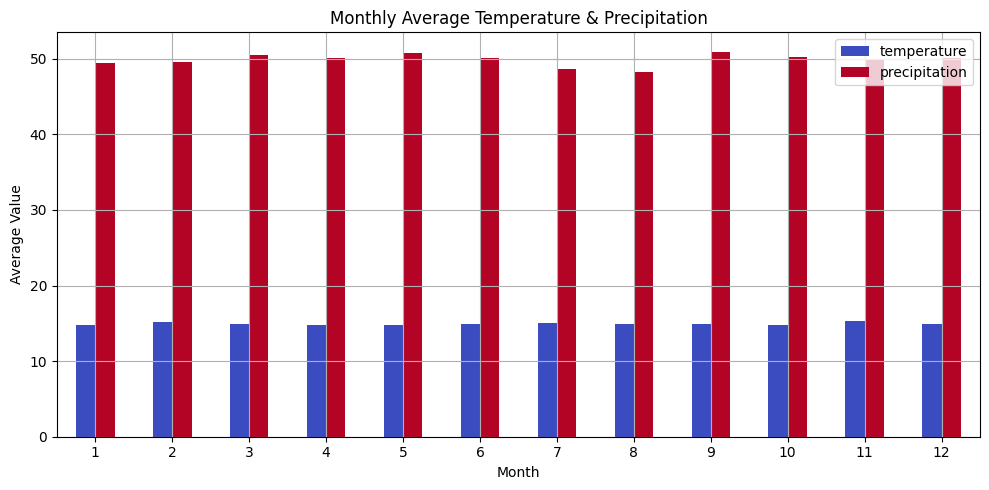

In [17]:
# Month-wise average temperature and precipitation

monthly_avg = df.groupby('month')[['temperature', 'precipitation']].mean()

monthly_avg.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.title("Monthly Average Temperature & Precipitation")
plt.xlabel("Month")
plt.ylabel("Average Value")

plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

Data transformation/ Feature Engineering

In [18]:
# Log transformation of Skewed features

df['log_co2'] = np.log1p(df['co2_emissions'])
df['log_precipitation'] = np.log1p(df['precipitation'])
df.head(2)

,location,country,temperature,co2_emissions,sea_level_rise,precipitation,humidity,wind_speed,year,month,day,log_co2,log_precipitation
date,,,,,,,,,,,,,
2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,6.001709,2.697005
2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,5.985606,3.737052


In [19]:
# Scaling numerical features

scaler = StandardScaler()
scaled_cols = ['temperature', 'sea_level_rise', 'humidity', 'wind_speed']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df.head(2)

,location,country,temperature,co2_emissions,sea_level_rise,precipitation,humidity,wind_speed,year,month,day,log_co2,log_precipitation
date,,,,,,,,,,,,,
2000-01-01 00:00:00.000000000,New Williamtown,Latvia,-0.844282,403.118903,0.726983,13.835237,-0.903628,-0.455556,2000,1,1,6.001709,2.697005
2000-01-01 20:09:43.258325832,North Rachel,South Africa,-0.222967,396.663499,1.219477,40.974084,-0.200096,0.633712,2000,1,1,5.985606,3.737052


In [20]:
# Country encoding

country_temp_map = df.groupby('country')['temperature'].mean()
df['country_encoded'] = df['country'].map(country_temp_map)
df.head(2)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_2980\4204237614.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_temp_map = df.groupby('country')['temperature'].mean()


,location,country,temperature,co2_emissions,sea_level_rise,precipitation,humidity,wind_speed,year,month,day,log_co2,log_precipitation,country_encoded
date,,,,,,,,,,,,,,
2000-01-01 00:00:00.000000000,New Williamtown,Latvia,-0.844282,403.118903,0.726983,13.835237,-0.903628,-0.455556,2000,1,1,6.001709,2.697005,-0.002153
2000-01-01 20:09:43.258325832,North Rachel,South Africa,-0.222967,396.663499,1.219477,40.974084,-0.200096,0.633712,2000,1,1,5.985606,3.737052,-0.117797


In [21]:
# Interaction features

df['temp_x_humidity'] = df['temperature'] * df['humidity']
df['co2_per_wind'] = df['co2_emissions'] / (df['wind_speed'] + 1e-3)  # avoid division by zero

In [22]:
# after dropping unnecessary columns

df.columns

Index(['location', 'country', 'temperature', 'co2_emissions', 'sea_level_rise',
       'precipitation', 'humidity', 'wind_speed', 'year', 'month', 'day',
       'log_co2', 'log_precipitation', 'country_encoded', 'temp_x_humidity',
       'co2_per_wind'],
      dtype='object')

Test-Train Split

In [28]:
# selecting multiple features

X = df.drop(columns=['temperature', 'co2_emissions', 'sea_level_rise', 'location', 'country'])
y = df[['temperature', 'co2_emissions', 'sea_level_rise']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ML Modles

In [32]:
# Using Random Forest to predict temperature

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Target: temperature
y_temp_train = y_train['temperature']
y_temp_test = y_test['temperature']

# Train model
rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temp.fit(X_train, y_temp_train)

# Predict output
y_pred_temp = rf_temp.predict(X_test)
print("Temperature MSE (Random Forest):", mean_squared_error(y_temp_test, y_pred_temp))

Temperature MSE (Random Forest): 0.018878422889842525


In [33]:
# Predicting CO2 emission uding Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

# Target: co2_emissions
y_co2_train = y_train['co2_emissions']
y_co2_test = y_test['co2_emissions']

# Train model
gb_co2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_co2.fit(X_train, y_co2_train)

# Predict
y_pred_co2 = gb_co2.predict(X_test)
print("CO₂ Emissions MSE (Gradient Boosting):", mean_squared_error(y_co2_test, y_pred_co2))

CO₂ Emissions MSE (Gradient Boosting): 0.2633759063905679


DL Models

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [35]:
# Extract target for sea level rise
y_sea_train = y_train['sea_level_rise']
y_sea_test = y_test['sea_level_rise']

In [36]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Build DL model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_sea_train, epochs=100, batch_size=8, verbose=0)

C:\Users\KIIT0001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Predict and evaluate
y_pred_sea = model.predict(X_test_scaled)
print("Sea Level Rise MSE (DL Model):", mean_squared_error(y_sea_test, y_pred_sea))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Sea Level Rise MSE (DL Model): 1.3278308738153473
